# 微积分  

> d2l库包含torch库，注意这个torch库不是原库，包括了matplotlib库。  
> matplotlib_inline库是解决matplotlib库在Jupyter Notebook中的适配问题的库。  
> plt.rcParms用来修改matplotlibrc中定义的默认参数。具体参考[plt.rcParams()详解](https://www.cnblogs.com/shuaishuaidefeizhu/p/14035247.html)

In [34]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def use_svg_display():
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

# print(d2l.plt.rcParams)

设置由matplotlib生成图表的轴的属性。

In [35]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线，因为我们需要在整个书中可视化许多曲线。

In [36]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
    set_figsize(figsize)

    # 获取当前axes，如果没有创建一个新的axes
    axes = axes if axes else d2l.plt.gca()
    
    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))
    
    # 将X和Y扩展至相同维度
    if has_one_axis(X):
        X = [X] #将X转化为list，并将X的值作为第一个元素
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla() # 清除当前的坐标轴
    
    # 绘制所有曲线
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)

    # 设置axes的属性
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [37]:
def f(x):
    return 3 * x ** 2 - 4 * x

两个常用列表操作:将当前变量变为list的一个元素；将list当前元素扩展n倍

In [38]:
u = np.linspace(0, 3, int((3 - 0) / 0.1 + 1))
print(u)
# 将u变为list_U的一个元素
list_U = [u]
print(list_U)
# 将list_U中的元素扩展2倍
print(list_U*2)
# 将f(u)和2 * u - 3变为list_y的两个元素
list_y = [f(u), 2 * u - 3]
print(list_y)
# 将list_y中的元素扩展2倍
print(list_y*2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])]
[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])]
[array([ 0.  , -0.37, -0.68, -0.93, -1.12, -1.25, -1.32, -1.33, -1.28,
       -1.17, -1.  , -0.77, -0.48, -0.13,  0.28,  0.75,  1.28,  1.87,
        2.52,  3.23,  4.  ,  4.83,  5.72,  6.67,  7.68,  8.75,  9.88,
       11.07, 12.32, 13.63, 15.  ]), array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.

现在我们可以绘制函数u = f(x)及其在x = 1处的切线y = 2x − 3，其中系数2是切线的斜率。

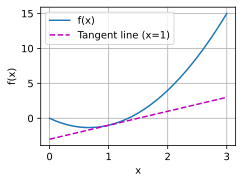

In [39]:
x = np.linspace(0, 3, int((3 - 0) / 0.1 + 1))
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])